In [2]:
import requests
import sys
import pandas as pd
import numpy as np
from scipy import sparse
from io import StringIO
import networkscience as ns
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# reading all datasets
country19_df = pd.read_csv('data\Erasmus19.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country18_df = pd.read_csv('data\Erasmus18.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country17_df = pd.read_csv('data\Erasmus17.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country16_df = pd.read_csv('data\Erasmus16.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country15_df = pd.read_csv('data\Erasmus15.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country14_df = pd.read_csv('data\Erasmus14.csv', sep=';',low_memory=False, header=0, encoding='utf8')

# merging all datasets
df = country19_df.append(country18_df)
df = df.append(country17_df)
df = df.append(country16_df)
df = df.append(country15_df)
df = df.append(country14_df)

In [4]:
# reply = requests.get('https://gitlab.com/data.europa.eu/data-provider-repository/-/raw/master/dg-eac/2021.05.11%20KA1%20mobilities%20eligible%20finalised%20started%20in%202018.csv?inline=false')
# reply.encoding = 'utf-8'
# csv_data = reply.text
# df = pd.read_csv(StringIO(csv_data), sep=';',low_memory=False, header=0)

for i, name in enumerate(df.columns):
    print(i, name)
df.drop(columns=['GroupLeader', 'Sending Organisation Erasmus Code', 'Receiving Organisation Erasmus Code'], inplace=True)
c_df = df.copy() # we will use it for later (country network)

0 Project Reference
1 Academic Year
2 Mobility Start Month
3 Mobility End Month
4 Mobility Duration
5 Activity (mob)
6 Field of Education
7 Participant Nationality
8 Education Level
9 Participant Gender
10 Participant Profile
11 Special Needs
12 Fewer Opportunities
13 GroupLeader
14 Participant Age
15 Sending Country Code
16 Sending City
17 Sending Organization
18 Sending Organisation Erasmus Code
19 Receiving Country Code
20 Receiving City
21 Receiving Organization
22 Receiving Organisation Erasmus Code
23 Participants


In [5]:
pd.options.display.max_columns=21
display(df)

,Project Reference,Academic Year,Mobility Start Month,Mobility End Month,Mobility Duration,Activity (mob),Field of Education,Participant Nationality,Education Level,Participant Gender,Participant Profile,Special Needs,Fewer Opportunities,Participant Age,Sending Country Code,Sending City,Sending Organization,Receiving Country Code,Receiving City,Receiving Organization,Participants
0,2016-3-EE01-KA105-034520,2019-2020,2019-03,2019-04,33.0,European Voluntary Service - Partner Countries,? Unknown ?,EE,??? - ? Unknown ?,Female,Learner,No,No,18,EE,TALLINN,MTÜ NOORTEVAHETUSE ARENGU ÜHING ESTYES,RU,Nizhny Novgorod,Interregional youth social movement of support...,1
1,2016-3-UK01-KA105-035288,2019-2020,2019-02,2019-03,56.0,European Voluntary Service - Partner Countries,? Unknown ?,IT,??? - ? Unknown ?,Male,Learner,No,Yes,29,IT,TRAPPETO,CESIE,UK,Cardiff,Language Academy Wales,1
2,2017-1-AT01-KA101-034705,2019-2020,2019-04,2019-04,6.0,Structured Courses/Training Events,Languages,AT,??? - ? Unknown ?,Female,Staff,No,No,39,AT,Hollabrunn,HTL Für Lebensmitteltechnologie-Lebensmittelsi...,EL,Heraklion,Institut für europäische Lehrerfortbildung UG ...,1
3,2017-1-AT01-KA101-034727,2019-2020,2019-02,2019-02,15.0,Structured Courses/Training Events,Teacher training with subject specialization,AT,??? - ? Unknown ?,Female,Staff,No,No,27,AT,Weiz,BHAK/BHAS Weiz,IE,Dublin,Atlantic Language Dublin,1
4,2017-1-AT01-KA101-034774,2019-2020,2019-02,2019-02,5.0,Structured Courses/Training Events,Education,AT,??? - ? Unknown ?,Female,Staff,No,No,26,AT,Linz,Bundesbildungsanstalt für Elementarpädagogik,MT,St.Julian's,Executive Training Institute Ltd.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235409,2014-3-SE02-KA105-001055,2014-2015,2014-07,2014-07,9.0,Mobility of youth workers - Partner Countries,? Unknown ?,SI,??? - ? Unknown ?,Male,Staff,No,No,-1,SI,Slovenj Gradec,JZ Spotur,GE,Tbilisi,"Non Formal Education Youth Centre ""Sunny House""",1
235410,2014-3-SE02-KA105-001055,2014-2015,2014-07,2014-07,9.0,Mobility of youth workers - Partner Countries,? Unknown ?,SI,??? - ? Unknown ?,Male,Staff,No,No,27,SI,Slovenj Gradec,JZ Spotur,GE,Tbilisi,"Non Formal Education Youth Centre ""Sunny House""",1
235411,2014-3-SE02-KA105-001055,2014-2015,2014-07,2014-07,9.0,Mobility of youth workers - Partner Countries,? Unknown ?,TR,??? - ? Unknown ?,Female,Staff,No,No,25,TR,Istanbul,Toplum Gonulluleri Vakfi,GE,Tbilisi,"Non Formal Education Youth Centre ""Sunny House""",1
235412,2014-3-SE02-KA105-001055,2014-2015,2014-07,2014-07,9.0,Mobility of youth workers - Partner Countries,? Unknown ?,UA,??? - ? Unknown ?,Female,Staff,No,No,22,UA,Kyiv,All-Ukrainian Association for Youth Co-operati...,GE,Tbilisi,"Non Formal Education Youth Centre ""Sunny House""",1


In [6]:
mobility_df = df[df[df.columns[10]]=='Learner']
mobility_df = mobility_df[mobility_df['Activity (mob)'].str.contains('Student')]
mobility_df = mobility_df[~mobility_df['Activity (mob)'].str.contains('traineeship')]
mobility_df = mobility_df.loc[:, df.columns[np.array((16, 19, 20, 5, 15, 18))]]
print((mobility_df['Receiving Organization'].nunique()))
print((mobility_df['Sending Organization'].nunique()))

5410
6505


In [7]:
mobility_df['Sending Organization'] = mobility_df['Sending Organization'].str.upper()
mobility_df['Receiving Organization'] = mobility_df['Receiving Organization'].str.upper()

print('Number of Receiving Universities: ',(mobility_df['Receiving Organization'].nunique()))
print('Number of Sending Universities: ',(mobility_df['Sending Organization'].nunique()))
mobility_df

Number of Receiving Universities:  5220
Number of Sending Universities:  6253


,Sending Organization,Receiving Organization,Participants,Activity (mob),Sending City,Receiving City
276,CHINA FOREIGN AFFAIRS UNIVERSITY,DIPLOMATISCHE AKADEMIE WIEN,1,Student mobility for Studies To/From Partner C...,Beijing,WIEN
277,FACHHOCHSCHULE DES BFI WIEN GESELLSCHAFT M.B.H.,SOUTHERN FEDERAL UNIVERSITY,1,Student mobility for Studies To/From Partner C...,Wien,ROSTOV ON DON
278,SOUTHERN FEDERAL UNIVERSITY,FACHHOCHSCHULE DES BFI WIEN GESELLSCHAFT M.B.H.,1,Student mobility for Studies To/From Partner C...,ROSTOV ON DON,Wien
279,FEDERAL STATE BUDGET EDUCATIONAL INSTITUTION O...,FACHHOCHSCHULE DES BFI WIEN GESELLSCHAFT M.B.H.,1,Student mobility for Studies To/From Partner C...,SAINT PETERSBURG,Wien
280,SOUTHERN FEDERAL UNIVERSITY,FACHHOCHSCHULE DES BFI WIEN GESELLSCHAFT M.B.H.,1,Student mobility for Studies To/From Partner C...,ROSTOV ON DON,Wien
...,...,...,...,...,...,...
214990,OXFORD BROOKES UNIVERSITY,POLITECNICO DI TORINO,1,Student mobility for studies between Programme...,OXFORD,TORINO
214991,OXFORD BROOKES UNIVERSITY,POLITECNICO DI TORINO,1,Student mobility for studies between Programme...,OXFORD,TORINO
214992,OXFORD BROOKES UNIVERSITY,UNIVERSIDAD DE ZARAGOZA,1,Student mobility for studies between Programme...,OXFORD,ZARAGOZA
214993,OXFORD BROOKES UNIVERSITY,POLITECNICO DI TORINO,1,Student mobility for studies between Programme...,OXFORD,TORINO


In [8]:
nodes = np.array(list(set.union(set(mobility_df.loc[:, mobility_df.columns[0]]), set(mobility_df.loc[:, mobility_df.columns[1]]))))
node_position = {}
for i, name in enumerate(nodes):
    node_position[name] = i
nodes_df = pd.DataFrame({'Nodes': nodes})
mobility_df['SendId'] = (np.array(list(map(lambda x: node_position[x], mobility_df['Sending Organization']))))
mobility_df['RecId']= (np.array(list(map(lambda x: node_position[x], mobility_df['Receiving Organization']))))
# Adjacency matrix
adj_matrix_crs = sparse.csr_matrix((nodes.size, nodes.size),dtype=int)
adj_matrix_csc = sparse.csc_matrix((nodes.size, nodes.size),dtype=int)

In [9]:
mobility_serie = mobility_df.groupby(['SendId', 'RecId']).sum()
row = np.array(mobility_serie.index.get_level_values(1).tolist())
col = np.array(mobility_serie.index.get_level_values(0).tolist())
val = mobility_serie.values
adj_matrix_crs = sparse.csr_matrix((val.flatten(), (row, col)), shape=(nodes.size, nodes.size))

# cercasi 70 Gb di ram, no perditempo
# ns.visualize_adj(adj_matrix_crs)

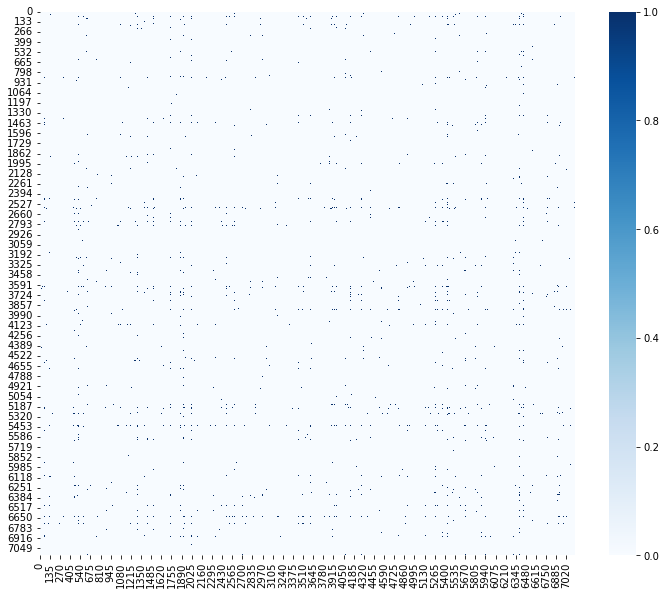

In [10]:
fig, ax = plt.subplots(1,1,figsize=(12,10))
a_adj = adj_matrix_crs.toarray()
a_adj[a_adj>1] = 1
sns.heatmap(a_adj, cmap="Blues", ax=ax)
plt.show()

In [11]:
mobility_df.rename({'Sending Organization': 'source','Receiving Organization': 'target', 'Participants':'weight'},axis=1, inplace=True)
uni_cities = mobility_df.copy()
adj_matrix_crs, mobility_df, nodes_df = ns.keep_giant(ns.find_components(adj_matrix_crs, nodes_df), mobility_df)

### Degree distribution

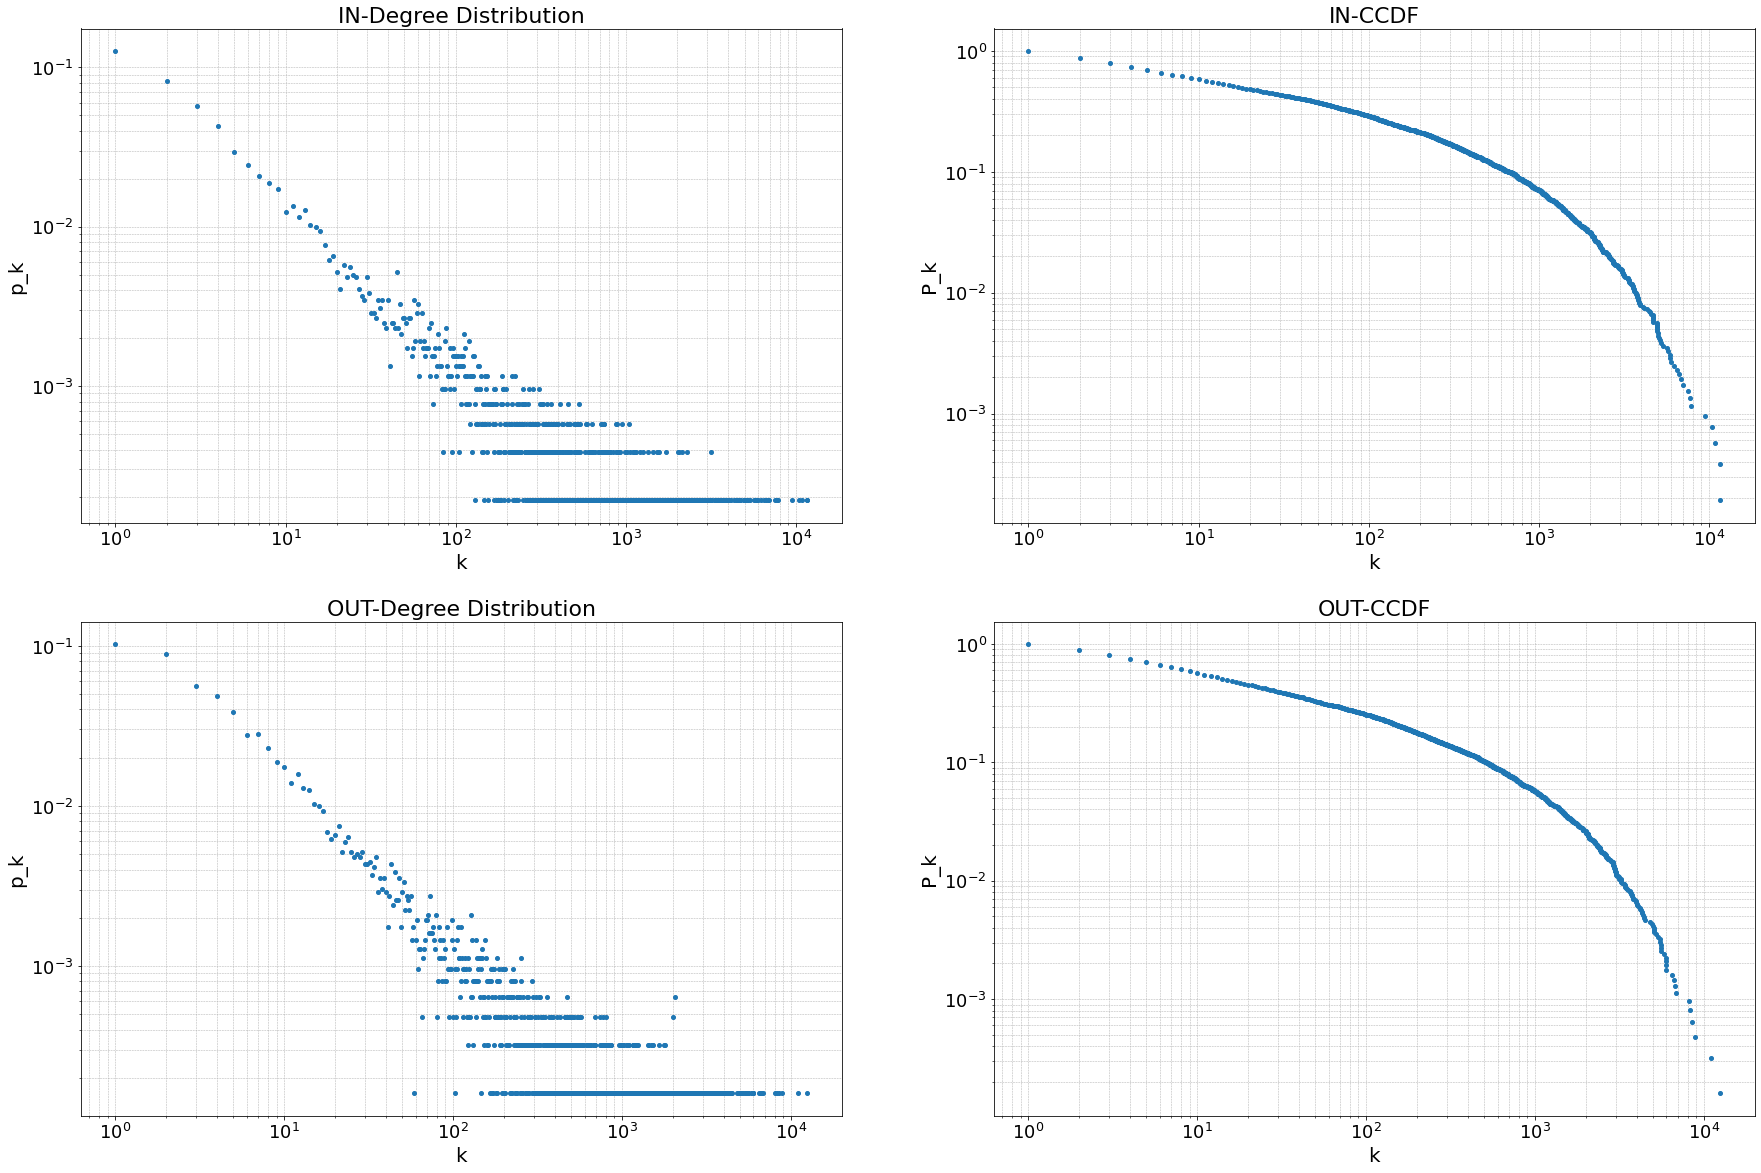

,Nodes,in degree
2266,UNIVERSITAT DE VALENCIA,11611
4048,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,11540
2630,UNIVERSIDAD DE GRANADA,10809
5051,UNIVERSIDADE DE LISBOA,10424
5976,UNIVERSIDAD COMPLUTENSE DE MADRID,9414
4332,UNIVERSITAT POLITECNICA DE VALENCIA,7854
3636,UNIVERZA V LJUBLJANI,7762
2963,KATHOLIEKE UNIVERSITEIT LEUVEN,7487
4613,UNIVERSIDAD DE SEVILLA,6978
6603,NORGES TEKNISK-NATURVITENSKAPELIGE UNIVERSITET...,6818


Top 10 for in degree
Top 10 for out degree


,Nodes,out degree
4048,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,12477
2630,UNIVERSIDAD DE GRANADA,11026
2266,UNIVERSITAT DE VALENCIA,8866
5976,UNIVERSIDAD COMPLUTENSE DE MADRID,8467
2016,UNIVERSITA DEGLI STUDI DI PADOVA,8302
817,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,8102
2963,KATHOLIEKE UNIVERSITEIT LEUVEN,6867
2220,UNIVERSIDAD DEL PAIS VASCO/ EUSKAL HERRIKO UNI...,6700
6421,UNIVERSITA DEGLI STUDI DI TORINO,6664
1301,UNIVERSIDAD POLITECNICA DE MADRID,6446


In [12]:
scores = ns.degree_disribution(adj_matrix_crs, nodes_df, print_graph=True)
ns.display_top_n(scores, 10, 'in degree')
ns.display_top_n(scores, 10, 'out degree')

### Estimating $\gamma$ 

In [13]:
from collections import Counter
from statistics import mean

d_in = scores['in degree']
d_in = d_in[d_in>0]
d_out = scores['out degree']
d_out = d_out[d_out>0]
kmin = 100
d2_in = d_in[d_in>kmin]
d2_out = d_out[d_out>kmin]

sorted_d = sorted(d_in)
occurrence = Counter(sorted_d)
x_in = list(occurrence.keys())
y_in = list(occurrence.values())
y_in = y_in/np.sum(y_in)

sorted_d = sorted(d_out)
occurrence = Counter(sorted_d)
x_out = list(occurrence.keys())
y_out = list(occurrence.values())
y_out = y_out/np.sum(y_out)

Pk_in = 1 - np.cumsum(y_in)
Pk_in[-1] = 1 
Pk_in = sorted(Pk_in, reverse = True)
Pk_out = 1 - np.cumsum(y_out)
Pk_out[-1] = 1 
Pk_out = sorted(Pk_out, reverse = True)

In [14]:
ga_in = 1 + 1/mean(np.array(np.log(d2_in/kmin)))
ga_out = 1 + 1/mean(np.array(np.log(d2_out/kmin)))
C_in = (ga_in-1)*kmin**(ga_in-1) # normalization condition
C_out = (ga_out-1)*kmin**(ga_out-1)

pos_in = np.argmax(np.array(x_in)>=kmin)
pos_out = np.argmax(np.array(x_out)>=kmin)

P_kmin_in = Pk_in[pos_in] # constant value that shifts the line where the data are placed
pk_in = C_in*P_kmin_in*x_in**-ga_in
Pk_est_in = C_in*P_kmin_in*x_in**(-(ga_in-1))/(ga_in-1) 

P_kmin_out = Pk_out[pos_out] # constant value that shifts the line where the data are placed
pk_out = C_out*P_kmin_out*x_out**-ga_out
Pk_est_out = C_out*P_kmin_out*x_out**(-(ga_out-1))/(ga_out-1) 

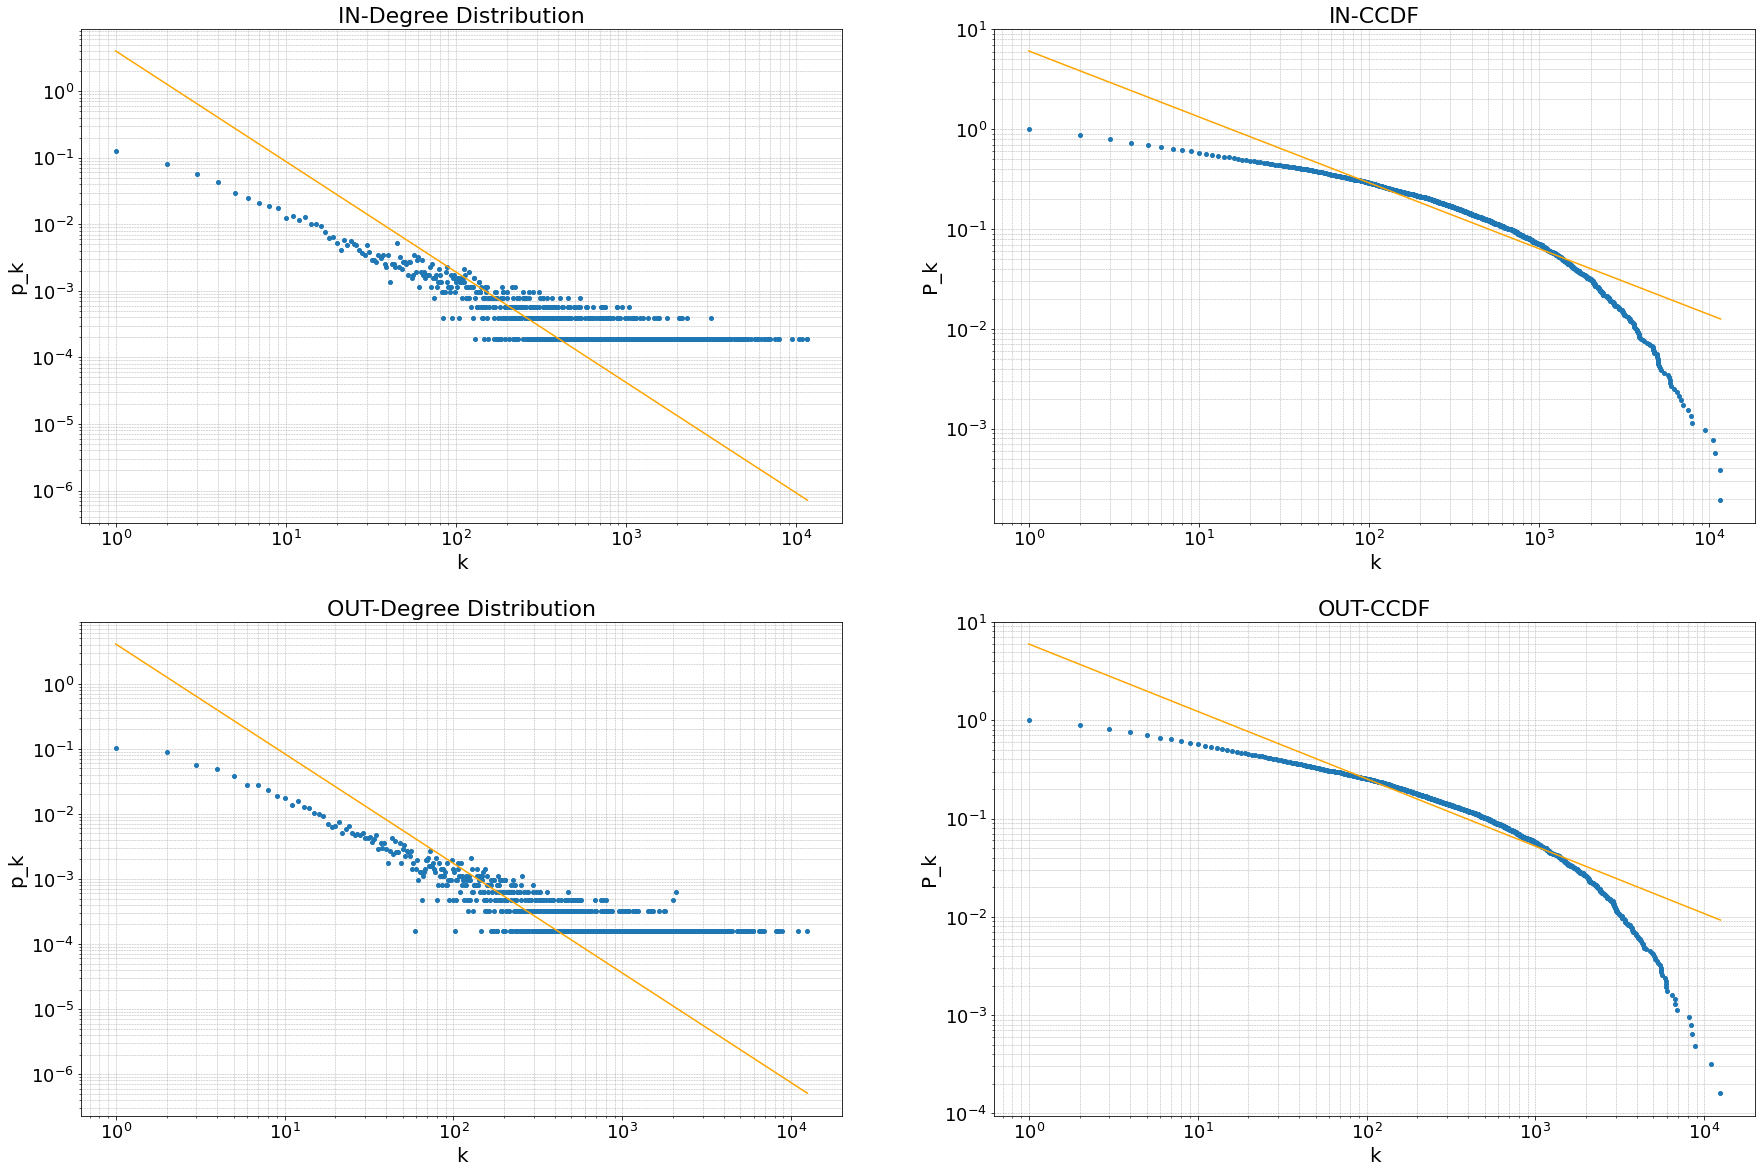

In [15]:
fig, ax = plt.subplots(2, 2, figsize = (30, 20))

def plot_gamma(ax, x, y, title, p, cumulative=False):
    ax.loglog(x, y, 'o', markersize = 4)
    ax.loglog(x, p, color='orange')
    ax.grid(which='both', linestyle='--', linewidth=0.5)
    ax.set_title(title, size = 22)
    ax.set_xlabel("k", size = 20)
    if cumulative:
        ax.set_ylabel("P_k", size = 20)
    else:
        ax.set_ylabel("p_k", size = 20)
    ax.tick_params(labelsize=18)
    ax.tick_params(labelsize=18)

plot_gamma(ax[0,0], x_in, y_in, "IN-Degree Distribution", pk_in)
plot_gamma(ax[0,1], x_in, Pk_in, "IN-CCDF", Pk_est_in, True)
plot_gamma(ax[1,0], x_out, y_out, "OUT-Degree Distribution", pk_out)
plot_gamma(ax[1,1], x_out, Pk_out, "OUT-CCDF", Pk_est_out, True)
plt.show()

### Estimating $\gamma$ through a linear fit with log binning

In [16]:
# Log binning 
nbins = 20
bins = np.logspace(0, 3.3, nbins)

hist_in = np.histogram(d_in, bins=bins, density=True)
hist_out = np.histogram(d_out, bins=bins, density=True)
logbin_p_k_in = hist_in[0]
logbin_p_k_out = hist_out[0]
middle_bins = np.sqrt( np.delete(bins, 0) * np.delete(bins, nbins-1) )

mask = np.log10(middle_bins) > np.log10(kmin)
x = np.log10( middle_bins[mask] )
y_in = np.log10( logbin_p_k_in[mask] )
y_out = np.log10( logbin_p_k_out[mask] )

# Linear fit
params_in = np.polyfit(x, y_in, deg =1)
params_out = np.polyfit(x, y_out, deg =1)
lin_gamma_in = -params_in[0]
lin_gamma_out = -params_out[0]

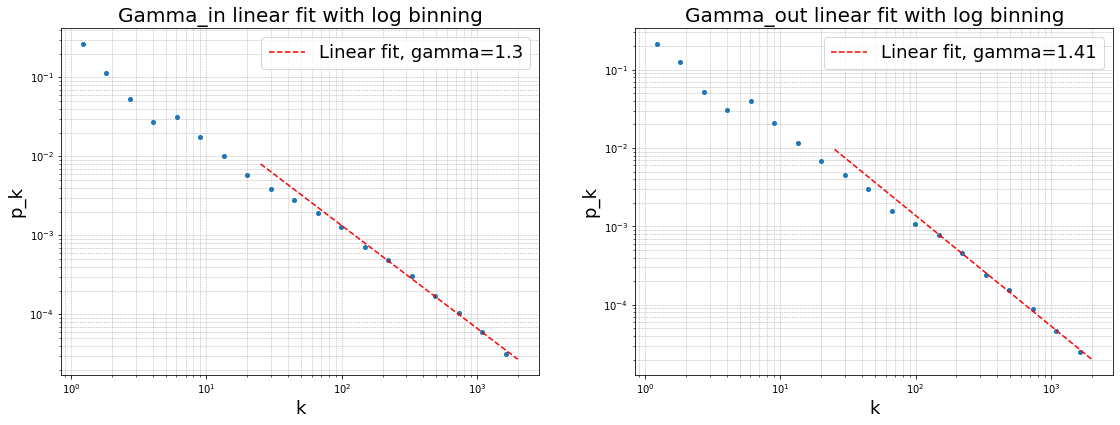

In [17]:
plt.figure(figsize=(60, 60))
plt.subplot(8, 6, 1)
plt.loglog(middle_bins, logbin_p_k_in , 'o', markersize = 4)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.title("Gamma_in linear fit with log binning", size = 20)
plt.xlabel("k", size = 18)
plt.ylabel("p_k", size = 18)
x2 = np.logspace(1.4,3.3,100)
y2 = np.full( 100, 10**(params_in[1])*x2**(-lin_gamma_in) ) 
plt.plot(x2,y2, label ="Linear fit, gamma="+str( np.round(lin_gamma_in,2) ), color="red", linestyle="--")
plt.legend(fontsize=18)

plt.subplot(8, 6, 2)
plt.loglog(middle_bins, logbin_p_k_out , 'o', markersize = 4)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.title("Gamma_out linear fit with log binning", size = 20)
plt.xlabel("k", size = 18)
plt.ylabel("p_k", size = 18)
x2 = np.logspace(1.4,3.3,100)
y2 = np.full( 100, 10**(params_out[1])*x2**(-lin_gamma_out) ) 
plt.plot(x2,y2, label ="Linear fit, gamma="+str( np.round(lin_gamma_out,2) ), color="red", linestyle="--")
plt.legend(fontsize=18)

plt.show()

### HITS (NetworkX)

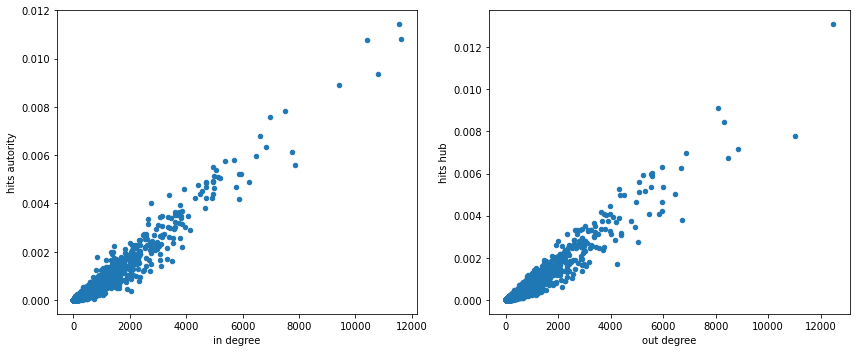

Top 10 for hits hub


,Nodes,hits hub
4048,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.013100
817,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,0.009089
2016,UNIVERSITA DEGLI STUDI DI PADOVA,0.008444
2630,UNIVERSIDAD DE GRANADA,0.007785
2266,UNIVERSITAT DE VALENCIA,0.007185
2963,KATHOLIEKE UNIVERSITEIT LEUVEN,0.006954
5976,UNIVERSIDAD COMPLUTENSE DE MADRID,0.006739
5051,UNIVERSIDADE DE LISBOA,0.006314
6421,UNIVERSITA DEGLI STUDI DI TORINO,0.006247
6297,UNIWERSYTET WARSZAWSKI,0.006037


Top 10 for hits autority


,Nodes,hits autority
4048,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.011440
2266,UNIVERSITAT DE VALENCIA,0.010822
5051,UNIVERSIDADE DE LISBOA,0.010794
2630,UNIVERSIDAD DE GRANADA,0.009381
5976,UNIVERSIDAD COMPLUTENSE DE MADRID,0.008920
2963,KATHOLIEKE UNIVERSITEIT LEUVEN,0.007841
4613,UNIVERSIDAD DE SEVILLA,0.007591
5330,UNIVERSITAT DE BARCELONA,0.006804
6603,NORGES TEKNISK-NATURVITENSKAPELIGE UNIVERSITET...,0.006340
3636,UNIVERZA V LJUBLJANI,0.006119


In [18]:
df = ns.hits_alg(adj_matrix_crs, nodes_df, score_df=scores, print_graph=True)
scores = pd.merge(scores, df, on='Nodes')

ns.display_top_n(scores, 10, 'hits hub')
ns.display_top_n(scores, 10, 'hits autority')

### PageRank (NetworkX)

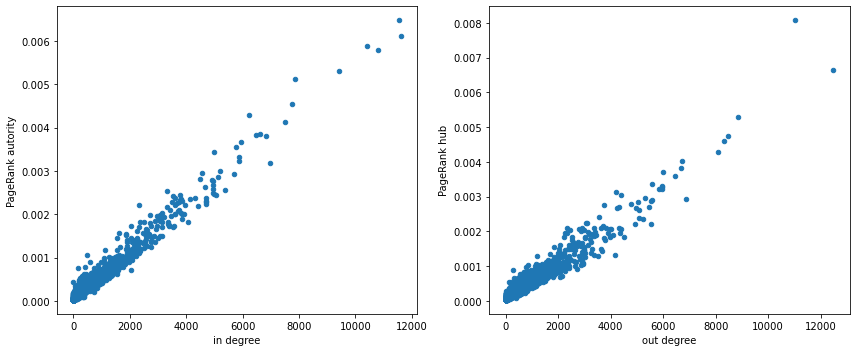

Top 10 for PageRank hub


,Nodes,PageRank hub
2630,UNIVERSIDAD DE GRANADA,0.008073
4048,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.006650
2266,UNIVERSITAT DE VALENCIA,0.005288
5976,UNIVERSIDAD COMPLUTENSE DE MADRID,0.004742
2016,UNIVERSITA DEGLI STUDI DI PADOVA,0.004605
817,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,0.004285
2220,UNIVERSIDAD DEL PAIS VASCO/ EUSKAL HERRIKO UNI...,0.004039
6421,UNIVERSITA DEGLI STUDI DI TORINO,0.003837
3636,UNIVERZA V LJUBLJANI,0.003712
1301,UNIVERSIDAD POLITECNICA DE MADRID,0.003598


Top 10 for PageRank autority


,Nodes,PageRank autority
4048,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.006472
2266,UNIVERSITAT DE VALENCIA,0.006109
5051,UNIVERSIDADE DE LISBOA,0.005881
2630,UNIVERSIDAD DE GRANADA,0.005778
5976,UNIVERSIDAD COMPLUTENSE DE MADRID,0.005299
4332,UNIVERSITAT POLITECNICA DE VALENCIA,0.005129
3636,UNIVERZA V LJUBLJANI,0.004541
516,POLITECNICO DI MILANO,0.004299
2963,KATHOLIEKE UNIVERSITEIT LEUVEN,0.004136
5330,UNIVERSITAT DE BARCELONA,0.003863


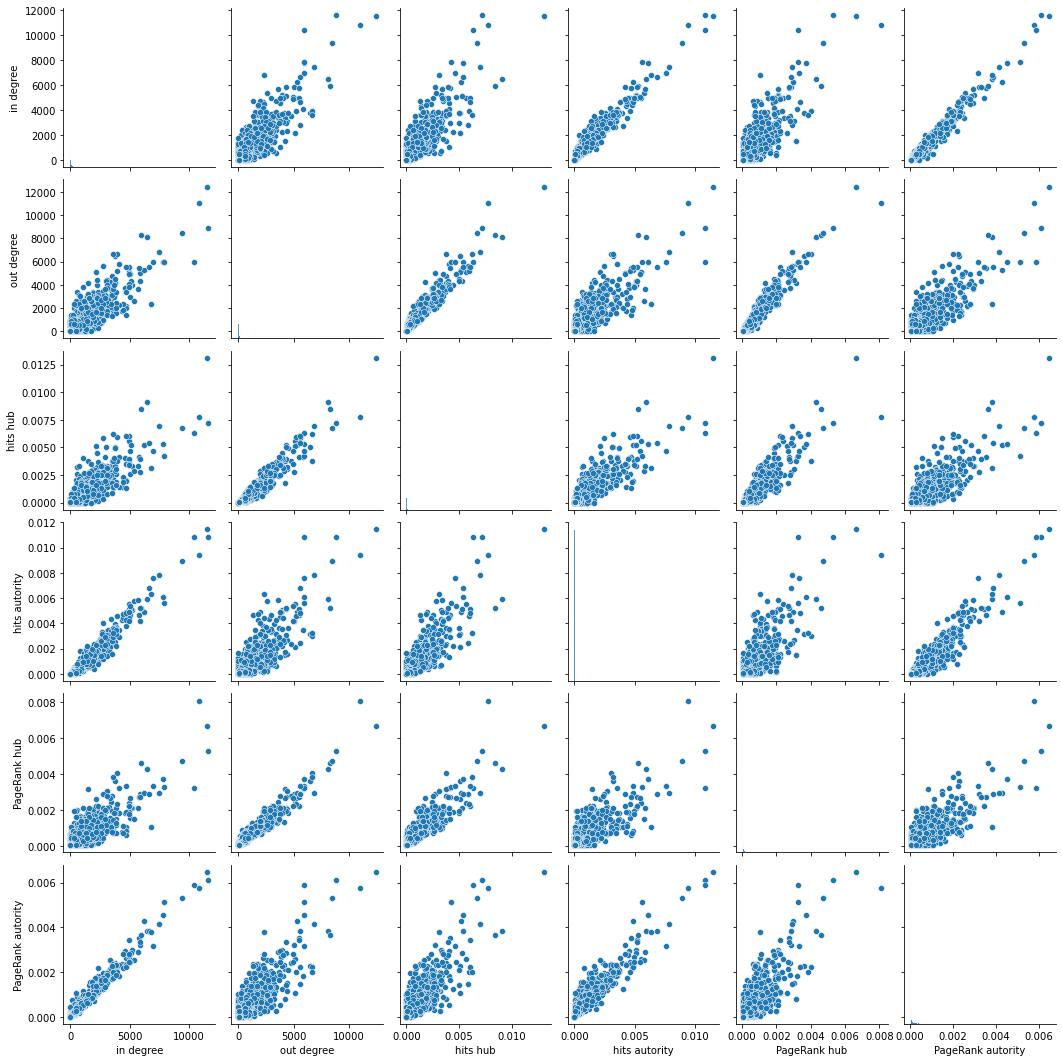

In [19]:
df = ns.pagerank_alg(adj_matrix_crs, nodes_df, score_df=scores, print_graph=True)
scores = pd.merge(scores, df, on='Nodes')

ns.display_top_n(scores, 10, 'PageRank hub')
ns.display_top_n(scores, 10, 'PageRank autority')
# ci vuole troppo a farlo
sns.pairplot(scores[['in degree', 'out degree',  'hits hub',
       'hits autority', 'PageRank hub', 'PageRank autority']])
plt.show()
# from IPython.display import Image
# Image('pairplot_score.png',)

### Assortativity

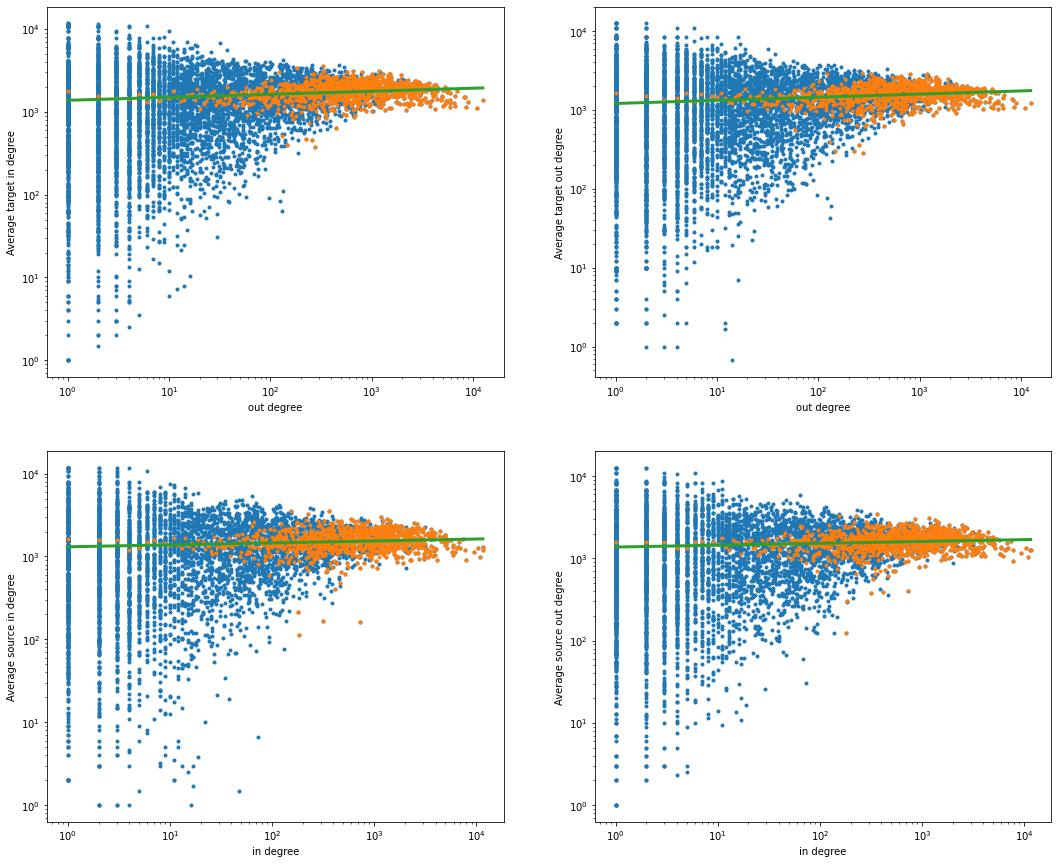

(0.03640513833878802,
 0.03978985392617848,
 0.02346311267528153,
 0.0225624509545072)

In [20]:
edges = mobility_df.copy()
ns.assortativity_calc(edges, adj_matrix_crs, nodes_df, True)

## Communities

In [21]:
import networkx as nx

# G = nx.convert_matrix.from_scipy_sparse_matrix(adj_matrix_crs)
G = nx.convert_matrix.from_scipy_sparse_matrix(adj_matrix_crs, create_using= nx.DiGraph)
p = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
node_comm = nodes_df.copy()
node_comm.drop(columns=['NodeID'], inplace=True)

node_comm['Community']=np.zeros(len(node_comm.index),dtype='int8')
for i, set in enumerate(p):
    for element in set:
        node_comm.iat[element, 1]=i
for i, set in enumerate(p):
    display(node_comm[node_comm['Community']==i])
    
scores['uni_Community'] = node_comm['Community']
# 52 communities. Choose if it makes sense to reduce the number of them 

,Nodes,Community
1,FONDACIONI ZOJA E KESHILLIT TE MIRE,0
2,ECOLE NATIONALE SUPÉRIEURE DES ARTS ET TECHNIQ...,0
3,INSTITUT NATIONAL SUPÉRIEUR DES ENSEIGNEMENTS ...,0
5,ECOLE HASSANIA DES TRAVAUX PUBLICS,0
6,UNIVERSITY OF NICOSIA,0
...,...,...
7105,BSP BUSINESS SCHOOL BERLIN GMBH,0
7108,TAJIK STATE UNIVERSITY OF COMMERCE,0
7109,FUNDACIO PRIVADA UNIVERSITAT ABAT OLIBA CEU,0
7110,UNIVERSITÉ ABDERRAHMANE MIRA-BEJAIA,0


,Nodes,Community
0,UNIVERSIDADE FEDERAL DE VIÇOSA,1
4,UNIVERSITAS SEBELAS MARET,1
7,UNIVERSITAT JAUME I DE CASTELLON,1
9,VALDOSTA STATE UNIVERSITY,1
11,"INSTITUTE OF EDUCATION,UNIVERSITY OF LONDON",1
...,...,...
7095,INSTITUT RÉGIONAL DE FORMATION SANITAIRE ET SO...,1
7100,"TEACHER EDUCATION FACULTY, UNIVERSITY OF BELG...",1
7104,UNIVERSITE CHEIKH ANTA DIOP DE DAKAR,1
7106,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,1


,Nodes,Community
10,RUSSIAN STATE SOCIAL UNIVERSITY,2
16,CONSERVATORIO SUPERIOR DE MÚSICA DE ARAGÓN,2
26,"CONSERVATORIO DI MUSICA ""STANISLAO GIACOMANTONIO""",2
51,YANKA KUPALA STATE UNIVERSITY OF GRODNO,2
64,CONSERVATORIO DI MUSICA FRANCESCO VENEZZE,2
...,...,...
7087,CZECH REPUBLIC-MINISTRY OF DEFENCE-UNIVERSITY ...,2
7092,FUNDACIÓ PER ALS ESTUDIS SUPERIORS DE MÚSICA I...,2
7096,NORTH-WEST INSTITUTE OF MANAGEMENT - BRANCH OF...,2
7098,POLIISIAMMATTIKORKEAKOULU,2


,Nodes,Community
103,YURIY FEDKOVYCH CHERNIVTSI NATIONAL UNIVERSITY,3
126,"""KATHOLISCHE STIFTUNGSHOCHSCHULE MÜNCHEN"" HOCH...",3
150,BAKU HIGHER OIL SCHOOL,3
154,ESCOLA SUPERIOR DE ENFERMAGEM DO PORTO,3
197,ALFOREAS INSTITUT REGIONAL DU TRAVAIL SOCIAL D...,3
...,...,...
6981,KATHOLISCHE STIFTUNGSFACHHOCHSCHULE MÜNCHEN. S...,3
6992,EWANGELIKALNA WYZSZA SZKOLA TEOLOGICZNA,3
7035,DIPLOMATISCHE AKADEMIE WIEN,3
7041,DEBRECENI REFORMÁTUS HITTUDOMÁNYI EGYETEM,3


,Nodes,Community
27,GORDON COLLEGE,4
42,ODESSA NATIONAL MARITIME UNIVERSITY,4
58,GEORGIAN INSTITUTE OF PUBLIC AFFAIR FOUNDATION,4
260,TIRANA UNIVERSITY,4
297,"UNIVERSITETI ""EQREM ÇABEJ"" GJIROKASTËR",4
...,...,...
6904,TAJIK NATIONAL UNIVERSITY,4
6915,MARIN BARLETI SHA,4
6991,UNIVERSITY OF MASSACHUSETTS BOSTON,4
7020,RUSSIAN-ARMENIAN (SLAVONIC) UNIVERSITY,4


,Nodes,Community
217,"NATIONAL UNIVERSITY CORPORATION, KYOTO UNIVERSITY",5
365,UZHGORODSKYI NACIONALNYI UNIVERSITET,5
373,EUROPEAN UNIVERSITY OF MOLDOVA,5
386,PLUMPTON COLLEGE,5
451,ST. AUGUSTINE UNIVERSITY OF TANZANIA,5
...,...,...
6516,MINGACHEVIR STATE UNIVERSITY,5
6788,LYCÉE GÉNÉRAL ET TECHNOLOGIQUE JEAN MONNET,5
6859,IVANOVO STATE UNIVERSITY,5
6971,"UNIVERSITATEA DE VEST ""VASILE GOLDIŞ"" DIN ARAD",5


,Nodes,Community
262,INSTITUT DE VIC,6
371,MOHAWK COLLEGE OF APPLIED ARTS AND TECHNOLOGY,6
477,LYCÉE JULES GUESDE,6
791,IES ESCUELA SUPERIOR DE HOSTELERÍA Y TURISMO,6
4042,FONDAZIONE ISTITUTO TECNICO SUPERIORE PER LE N...,6
5032,LYCEE GENERAL TECHNIQUE GASTON BERGER,6
5922,EIA - ENSINO E INVESTIGACAO E ADMINISTRACAO SA,6
6281,INSTITUT ESCOLA DEL TREBALL,6
6605,FONDAZIONE ISTITUTO TECNICO SUPERIORE PER LE N...,6
6862,I.E.S. FERMIN BOUZA BREY,6


,Nodes,Community
209,MIDDLE EAST UNIVERSITY,7
2924,INTERNATIONAL CENTRE FOR EDUCATION IN ISLAMIC ...,7
4265,UNIVERSITE EZ-ZITOUNA,7
4338,ISLAMIC UNIVERSITY OF APPLIED SCIENCES ROTTERDAM,7
4450,ISTANBUL SABAHATTIN ZAIM UNIVERSITY,7
5730,UNIVERSITE ALQUARAOUIYINE,7
5974,UNIVERSITE IBNOU ZOHR A AGADIR,7


,Nodes,Community
700,IES HOTEL ESCUELA,8
1471,SOUTH WEST COLLEGE,8
1965,IES MARIA DE ZAYAS Y SOTOMAYOR,8
3833,LYCÉE DES MÉTIERS DE L'HÔTELLERIE ET DU TOURIS...,8
3986,CENTRO INTEGRAL DE FP ILERNA S.L.,8
5643,FONDAZIONE ISTITUTO TECNICO SUPERIORE PER TECN...,8
5997,CENTRE INTEGRAL DE FP ILERNA S.L.,8


,Nodes,Community
2171,KAREN BAPTIST THEOLOGICAL SEMINARY,9
3942,ANSGAR TEOLOGISKE HØGSKOLE,9
4763,EESTI EVANGEELIUMI KRISTLASTE JA BAPTISTIDE KO...,9
4888,LONDON SCHOOL OF THEOLOGY,9
5443,AKADEMI FÖR LEDARSKAP OCH TEOLOGI,9
5868,ÖREBRO SCHOOL OF THEOLOGY,9


,Nodes,Community
722,VISOKA POSLOVNA STRUKOVNIH SKOLA STDIJA U NOVO...,10
861,COLLEGE OF PROFESSIONAL STUDIES IN MANAGEMENT ...,10
1737,VISOKA SOLA ZA UPRAVLJANJE IN POSLOVANJE NOVO ...,10
2329,VISOKA SKOLA ZA MENADZMENT U TURIZMU I INFORMA...,10
3953,"FAKULTETA ZA UPRAVLJANJE, POSLOVANJE IN INFORM...",10


,Nodes,Community
1255,SAINT PETERSBURG NATIONAL RESEARCHUNIVERSITY O...,11
2417,IRKUTSK STATE UNIVERSITY,11
2852,BAIKAL STATE UNIVERSITY,11
2992,SAINT PETERSBURG NATIONAL RESEARCH UNIVERSITY ...,11
6353,HOCHSCHULE ZITTAU/GOERLITZ,11


,Nodes,Community
3169,ASSOCIATION RÉGIONALE POUR LA FORMATION PLURIP...,12
3246,IRTS REUNION,12
5770,ARFIS OI,12
6800,HAUTE ECOLE EN HAINAUT,12
6945,CROIX ROUGE FRANCAISE CRF IRFSS PACAC,12


,Nodes,Community
1653,HAUTE ECOLE PAUL-HENRI SPAAK,13
2933,INSTITUT RÉGIONAL DU TRAVAIL SOCIAL NORMANDIE ...,13
4742,INSTITUT RÉGIONAL DU TRAVAIL SOCIAL DE CHAMPAG...,13
5397,HAUTE ECOLE BRUXELLES-BRABANT (HE2B),13


,Nodes,Community
75,"EDUCATIONAL INSTITUTION ""BELARUSSIAN STATE PED...",14
1256,IAKOB GOGEBASHVILI TELAVI SATE UNIVERSITY,14
4439,LTD EAST EUROPEAN UNIVERSITY,14
5795,PADAGOGISCHE HOCHSCHULE OBEROSTERREICH,14


,Nodes,Community
919,FEDERAL STATE BUDGETARY EDUCATIONAL INSTITUTIO...,15
3304,RUSSIAN CHRISTIAN ACADEMY FOR THE HUMANITIES,15
4349,SCUOLA SUPERIORE PER MEDIATORI LINGUISTICI,15
5906,KEMEROVO STATE UNIVERSITY,15


,Nodes,Community
412,ECOLE INTERNATIONALE DES SCIENCES DU TRAITEMEN...,16
422,STATE EDUCATIONAL INSTITUTION OF HIGHER PROFES...,16
2787,NOVOSIBIRSK STATE UNIVERSITY,16


,Nodes,Community
141,CENTRE INTERNATIONAL DES HAUTES ETUDES AGRONOM...,17
4918,LEBANESE UNIVERSITY,17
5063,INSTITUT NATIONAL AGRONOMIQUE DE TUNISIE,17


,Nodes,Community
97,EUROPEAN UNIVERSITY - REPUBLIC OF MACEDONIA,18
1502,UNIVERSIDAD TECNOLOGICA DE EL SALVADOR,18
5830,ACADEMIA DRUZBA ZA STORITVE DOO,18


,Nodes,Community
4062,PUSHKIN STATE RUSSIAN LANGUAGE INSTITUTE,19
4570,WSZECHNICA POLSKA SZKOLA WYZSZA W WARSZAWIE,19
5893,UNIVERSIDAD NACIONAL ARTURO JAURETCHE,19


,Nodes,Community
5858,LYCÉE GEORGES DUBY,20
5993,INSTITUT JOAN BROSSA,20
6112,LYCEE OZENNE,20


,Nodes,Community
4721,KYIV THEOLOGICAL ACADEMY AND SEMINARY OF UKRAI...,21
5182,RELIGIOUS ORGANIZATION OF HIGHER THEOLOGICAL E...,21
6122,ANOTATI ECCLESIASTIKI AKADEMIA THESSALONIKIS,21


,Nodes,Community
1420,"INSTITUT SUPÉRIEUR DE L'EDUCATION SPÉCIALISÉE,...",22
3385,ASTRAKHAN STATE UNIVERSITY,22
6158,INSTITUT NATIONAL SUPERIEUR DE FORMATION ET DE...,22


,Nodes,Community
4148,LYCÉE GÉNÉRAL ET TECHNOLOGIQUE JEAN MACE,23
4863,LYCEE LOUISE MICHEL,23
6290,INS JOAQUIM MIR,23


,Nodes,Community
1010,UNITED STATES NAVAL ACADEMY,24
3455,ECOLE NAVALE GROUPEMENT INTERET PUBLIC,24
7103,ESCOLA NAVAL,24


,Nodes,Community
194,"VYSOKA SKOLA EVROPSKYCH A REGIONALNICH STUDII,...",25
1310,DUBNICKY TECHNOLOGICKY INSTITUT V DUBNICKI NAD...,25


,Nodes,Community
544,PAVLO TYCHYNA UMAN STATE PEDAGOGICAL UNIVERSITY,26
1682,PANSTWOWA WYZSZA SZKOLA ZAWODOWA IM. HIPOLITA ...,26


,Nodes,Community
2280,LYCEE AMPERE,27
2712,INSTITUT POBLENOU,27


,Nodes,Community
643,HOLAR UNIVERSITY COLLEGE,28
3788,UNIVERSITY OF GUELPH NON-PROFIT CORPORATION,28


,Nodes,Community
1140,ACCOUNTANCY & BUSINESS COLLEGE (IRELAND) LIMIT...,29
4025,SUD MANAGEMENT,29


,Nodes,Community
2134,VOLGA STATE UNIVERSITY OF TECHNOLOGY,30
4115,VYSOKA SKOLA DANUBIUS S.R.O.,30


,Nodes,Community
1898,STREDOEUROPSKA VYSOKA SKOLA V SKALICI,31
4157,"VYSOKA SKOLA EVROPSKYCH A REGIONALNICH STUDII,...",31


,Nodes,Community
1454,INSTITUTO DE EDUCACIÓN SECUNDARIA HOZGARGANTA,32
4196,VANCOUVER ISLAND UNIVERSITY,32


,Nodes,Community
1517,PRIVATUNIVERSITÄT SCHLOSS SEEBURG,33
4223,HOCHSCHULE FÜR ANGEWANDTES MANAGEMENT GMBH,33


,Nodes,Community
1149,PACIFIC LUTHERAN UNIVERSITY,34
4987,MF VITENSKAPELIG HØYSKOLE,34


,Nodes,Community
4387,ISTITUTO DI CULTURA PANTHEON S.R.L.,35
5213,ESCOLA MUNICIPAL D'ART I DISSENY DE TERRASSA,35


,Nodes,Community
59,THE MAXIM GORKY LITERARY INSTITUTE,36
5417,FONDAZIONE UNICAMPUS SAN PELLEGRINO,36


,Nodes,Community
2183,"SVEUČILIŠTE/UNIVERZITET ""VITEZ"" VITEZ",37
6061,COLLEGE OF APPLIED SCIENCES LAVOSLAV RUZICKA I...,37


,Nodes,Community
6035,EVANGELISCHE HOCHSCHULE FÜR KIRCHENMUSIK TÜBINGEN,38
6119,ERSTA SKÖNDAL BRÄCKE HÖGSKOLA,38


,Nodes,Community
4259,YNCRÉA HAUTS DE FRANCE ISEN-LILLE,39
6269,AMERICAN UNIVERSITY OF SCIENCE AND TECHNOLOGY,39


,Nodes,Community
752,ESCUELA DE ARTE Y SUPERIOR DE CONSERVACIÓN Y R...,40
6709,ACCADEMIA DI BELLE ARTI ALDO GALLI - I.L.E.M. SRL,40


,Nodes,Community
663,"ISTITUTO SUPERIORE DI STUDI MUSICALI ""TOSCANINI""",41
6724,PETROZAVODSK STATE GLAZUNOV CONSERVATOIRE,41


,Nodes,Community
4452,EPLEFPA LOT ET GARONNE,42
6745,INSTITUTO DE EDUCACIÓN SECUNDARIA JUAN CARLOS I,42


,Nodes,Community
3369,DAUGAVPILS MEDICAL COLLEGE,43
6746,MEHRABYAN MEDICAL INSTITUTE IN YEREVAN,43


,Nodes,Community
6058,UNIVERSITY OF THE PUNJAB,44


## Geographical heatmap

In [23]:
temp_df = uni_cities[['target', 'Receiving City']].copy()
temp_df.rename({'target':'source', 'Receiving City':'Sending City'},axis=1, inplace=True)
cities_uni = pd.concat([uni_cities[['source', 'Sending City']], temp_df]).drop_duplicates().reset_index(drop=True)
cities_uni.dropna(subset=['Sending City'], inplace=True)

for index in range(cities_uni.shape[0]):
    city = cities_uni.iat[index,1]
    if city != city.upper():
        cities_uni.iat[index,1] = city.upper()
cities_uni = cities_uni.drop_duplicates().reset_index(drop=True)
cities_uni = cities_uni.drop_duplicates(subset='source').reset_index(drop=True)

# assigning cities to each university in scores
cities_list = []
for u in scores['Nodes']:
    cities_list.append(list(cities_uni.loc[cities_uni['source'] == u, 'Sending City'])[0])

scores_cities = scores.copy()
scores_cities['City'] = cities_list

scores_cities

,Nodes,NodeID_x,in degree,out degree,NodeID_y,hits hub,hits autority,NodeID,PageRank hub,PageRank autority,uni_Community,City
0,UNIVERSIDADE FEDERAL DE VIÇOSA,0,3,15,0,8.744262e-06,2.280811e-06,0,0.000039,0.000028,1,VI�OSA
1,FONDACIONI ZOJA E KESHILLIT TE MIRE,1,0,1,1,2.944262e-07,-0.000000e+00,1,0.000030,0.000027,0,TIRANA
2,ECOLE NATIONALE SUPÉRIEURE DES ARTS ET TECHNIQ...,2,1,0,2,-0.000000e+00,8.611213e-09,2,0.000029,0.000029,0,LYON
3,INSTITUT NATIONAL SUPÉRIEUR DES ENSEIGNEMENTS ...,3,12,20,3,1.091734e-06,4.697739e-07,3,0.000043,0.000044,0,MARSEILLE
4,UNIVERSITAS SEBELAS MARET,4,0,4,4,3.443193e-06,-0.000000e+00,4,0.000032,0.000027,1,SURAKARTA
...,...,...,...,...,...,...,...,...,...,...,...,...
7108,TAJIK STATE UNIVERSITY OF COMMERCE,7108,0,17,7108,1.347607e-05,-0.000000e+00,7108,0.000040,0.000027,0,DUSHANBE
7109,FUNDACIO PRIVADA UNIVERSITAT ABAT OLIBA CEU,7109,14,18,7109,3.288366e-06,3.536216e-06,7109,0.000037,0.000037,0,BARCELONA
7110,UNIVERSITÉ ABDERRAHMANE MIRA-BEJAIA,7110,0,20,7110,3.288694e-06,-0.000000e+00,7110,0.000040,0.000027,0,BEJAIA
7111,KODOLANYI JANOS FOISKOLA,7111,467,48,7111,1.553628e-05,5.285060e-05,7111,0.000069,0.000293,0,BUDAPEST


In [24]:
city_coord = pd.read_csv('worldcities.csv', encoding='utf8')
city_coord.drop(columns=['capital', 'population', 'id', 'iso3', 'country'], inplace=True)
for index in range(city_coord.shape[0]):
    city = city_coord.iat[index,0]
    if city != city.upper():
        city_coord.iat[index,0] = city.upper()
city_coord = city_coord.drop_duplicates().reset_index(drop=True)
scores_cities = pd.merge(left=scores_cities, right=city_coord, how='left', left_on='City', right_on='city')
scores_cities.dropna(subset=['city'], inplace=True)
scores_cities = scores_cities.drop_duplicates(subset='Nodes').reset_index(drop=True)
scores_cities

# some cities are missing like Milano, Torino, Madrid (these are also pretty much important)

,Nodes,NodeID_x,in degree,out degree,NodeID_y,hits hub,hits autority,NodeID,PageRank hub,PageRank autority,uni_Community,City,city,city_ascii,lat,lng,iso2,admin_name
0,FONDACIONI ZOJA E KESHILLIT TE MIRE,1,0,1,1,2.944262e-07,-0.000000e+00,1,0.000030,0.000027,0,TIRANA,TIRANA,Tirana,41.3300,19.8200,AL,Tiranë
1,ECOLE NATIONALE SUPÉRIEURE DES ARTS ET TECHNIQ...,2,1,0,2,-0.000000e+00,8.611213e-09,2,0.000029,0.000029,0,LYON,LYON,Lyon,45.7600,4.8400,FR,Auvergne-Rhône-Alpes
2,INSTITUT NATIONAL SUPÉRIEUR DES ENSEIGNEMENTS ...,3,12,20,3,1.091734e-06,4.697739e-07,3,0.000043,0.000044,0,MARSEILLE,MARSEILLE,Marseille,43.2964,5.3700,FR,Provence-Alpes-Côte d’Azur
3,UNIVERSITAS SEBELAS MARET,4,0,4,4,3.443193e-06,-0.000000e+00,4,0.000032,0.000027,1,SURAKARTA,SURAKARTA,Surakarta,-7.5667,110.8167,ID,Jawa Tengah
4,ECOLE HASSANIA DES TRAVAUX PUBLICS,5,0,87,5,1.343485e-05,-0.000000e+00,5,0.000062,0.000027,0,CASABLANCA,CASABLANCA,Casablanca,33.5992,-7.6200,MA,Casablanca-Settat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,"CONSERVATORIO DI MUSICA ""GESUALDO DA VENOSA""",7107,0,4,7107,1.187519e-06,-0.000000e+00,7107,0.000037,0.000027,2,POTENZA,POTENZA,Potenza,40.6333,15.8000,IT,Basilicata
4936,TAJIK STATE UNIVERSITY OF COMMERCE,7108,0,17,7108,1.347607e-05,-0.000000e+00,7108,0.000040,0.000027,0,DUSHANBE,DUSHANBE,Dushanbe,38.5731,68.7864,TJ,Dushanbe
4937,FUNDACIO PRIVADA UNIVERSITAT ABAT OLIBA CEU,7109,14,18,7109,3.288366e-06,3.536216e-06,7109,0.000037,0.000037,0,BARCELONA,BARCELONA,Barcelona,41.3825,2.1769,ES,Catalonia
4938,KODOLANYI JANOS FOISKOLA,7111,467,48,7111,1.553628e-05,5.285060e-05,7111,0.000069,0.000293,0,BUDAPEST,BUDAPEST,Budapest,47.4983,19.0408,HU,Budapest


Importing geographic data also for countries

In [25]:
import geopandas as gpd
import pycountry as pc #library used for translating country codes from iso3 to iso2 standard

geo_df = gpd.read_file('countries.geojson')

def replace_iso2(alpha):
    try:
        return pc.countries.get(alpha_3=alpha).alpha_2
    except:
        return alpha
    
geo_df['iso2_code']= (np.array(list(map(lambda x: replace_iso2(x), geo_df['ISO_A3']))))

geo_df.columns = ['country', 'country_code', 'geometry', 'iso2_code']

# in geo_df United Kingdom has code GB, so we have to change it manually
# geo_df.loc[geo_df['country'] == 'United Kingdom', 'iso2_code'] = 'UK'
# geo_df.loc[geo_df['country'] == 'Greece', 'iso2_code'] = 'EL'
geo_df.loc[geo_df['country'] == 'Kosovo', 'iso2_code'] = 'XK'
geo_df.loc[geo_df['country'] == 'Czech Republic', 'country'] = 'Czechia'
geo_df.loc[geo_df['country'] == 'Republic of Serbia', 'country'] = 'Serbia'

# merge geometries with our dataframe
geo_scores = pd.merge(left=scores_cities, right=geo_df[['iso2_code', 'geometry']], how='left', 
                      left_on='iso2', right_on='iso2_code')
geo_scores = geo_scores[['Nodes', 'PageRank hub', 'PageRank autority', 'City', 'lat', 'lng',
                         'iso2', 'geometry', 'uni_Community']]

Dividing universities by their country community

In [26]:
import networkx as nx

### 1 create the network of countries only
country_df = c_df[c_df[c_df.columns[10]]=='Learner']
country_df = country_df.loc[:, c_df.columns[np.array((14, 17, 20))]]
country_df.dropna(how='any', inplace=True)

# c_nodes = np.array(list(set.union(set(country_df.loc[:, country_df.columns[0]]), set(country_df.loc[:, country_df.columns[1]]))))
c_nodes = np.array(list(pd.concat([country_df.loc[:, country_df.columns[0]], country_df.loc[:, country_df.columns[1]]]).drop_duplicates()))
country_df.dropna(how='any', inplace=True)

c_node_position = {}
for i, name in enumerate(c_nodes):
    c_node_position[name] = i
country_nodes= pd.DataFrame({'Nodes': c_nodes})
country_df['SendId'] = (np.array(list(map(lambda x: c_node_position[x], country_df['Sending Country Code']))))
country_df['RecId'] = (np.array(list(map(lambda x: c_node_position[x], country_df['Receiving Country Code']))))

# Adjacency matrix
country_serie = country_df.groupby(['SendId', 'RecId']).sum()
row = np.array(country_serie.index.get_level_values(1).tolist())
col = np.array(country_serie.index.get_level_values(0).tolist())
val = country_serie.values
c_adj_matrix = sparse.csr_matrix((val.flatten(), (row, col)), shape=(c_nodes.size, c_nodes.size))

### 2 countries community
# G_country = nx.convert_matrix.from_scipy_sparse_matrix(c_adj_matrix)
G_country = nx.convert_matrix.from_scipy_sparse_matrix(c_adj_matrix, create_using= nx.DiGraph)
p_c = nx.algorithms.community.modularity_max.greedy_modularity_communities(G_country)
country_comm = country_nodes.copy()
# some countries have a different code
country_comm.loc[country_comm['Nodes'] == 'UK', 'Nodes'] = 'GB'
country_comm.loc[country_comm['Nodes'] == 'EL', 'Nodes'] = 'GR'

country_comm['Community']=np.zeros(len(country_comm.index),dtype='int8')



for i, set in enumerate(p_c):
    for element in set:
        country_comm.iat[element, 1]=i
for i, set in enumerate(p_c):
    display(country_comm[country_comm['Community']==i])

geo_scores = pd.merge(left=geo_scores, right=country_comm, how='left', left_on='iso2', right_on='Nodes')

,Nodes,Community
1,IT,0
2,AT,0
6,ET,0
10,TH,0
11,KG,0
...,...,...
145,BI,0
149,MR,0
150,PA,0
151,BB,0


,Nodes,Community
0,EE,1
3,CN,1
4,RU,1
5,CU,1
7,RS,1
...,...,...
134,SK,1
146,BN,1
147,TL,1
148,BW,1


,Nodes,Community
22,UZ,2
38,BF,2
51,FR,2
74,NE,2
79,SG,2
...,...,...
130,SE,2
131,ZW,2
133,VE,2
138,CI,2


,Nodes,Community
29,BE,3
41,CD,3
45,SR,3
47,AL,3
62,DO,3
63,XK,3
68,BJ,3
82,KH,3
118,LT,3
137,GM,3


Focus on european countries

In [27]:
eu_countries = ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'Ukraine', 'Poland', 'Romania', 
                'Netherlands', 'Belgium', 'Czechia', 'Greece', 'Portugal', 'Sweden', 'Hungary', 
                'Belarus', 'Austria', 'Serbia', 'Switzerland', 'Bulgaria', 'Denmark', 'Finland', 'Slovakia', 'Norway',
                'Ireland', 'Croatia', 'Moldova', 'Bosnia and Herzegovina', 'Albania', 'Lithuania', 'Macedonia', 
                'Slovenia', 'Latvia', 'Estonia', 'Montenegro', 'Luxembourg', 'Malta', 'Iceland', 'Andorra', 'Monaco', 
                'Liechtenstein', 'Kosovo', 'Turkey']

def replace_iso3166(alpha):
    try:
        return pc.countries.get(name=alpha).alpha_2
    except:
        return alpha
    
eu_countries_iso2 = list(map(lambda x: replace_iso3166(x), eu_countries))

geo_scores = geo_scores[geo_scores['iso2'].isin(eu_countries_iso2)]

def replace_iso3166(alpha):
    try:
        return pc.countries.get(alpha_2=alpha).name
    except:
        return alpha
country_comm['Nodes'] = list(map(lambda x: replace_iso3166(x), country_comm['Nodes']))
country_comm = country_comm[country_comm['Nodes'].str.contains('|'.join(eu_countries))==True]
for i, set in enumerate(p_c):
    display(country_comm[country_comm['Community']==i])
    print(country_comm[country_comm['Community']==i].to_latex())

,Nodes,Community
1,Italy,0
2,Austria,0
50,Czechia,0
52,Denmark,0
64,Germany,0
...,...,...
98,Finland,0
106,Hungary,0
125,Poland,0
135,United Kingdom,0


\begin{tabular}{llr}
\toprule
{} &           Nodes &  Community \\
\midrule
1   &           Italy &          0 \\
2   &         Austria &          0 \\
50  &         Czechia &          0 \\
52  &         Denmark &          0 \\
64  &         Germany &          0 \\
77  &           Spain &          0 \\
98  &         Finland &          0 \\
106 &         Hungary &          0 \\
125 &          Poland &          0 \\
135 &  United Kingdom &          0 \\
153 &     Switzerland &          0 \\
\bottomrule
\end{tabular}



,Nodes,Community
0,Estonia,1
7,Serbia,1
9,Ukraine,1
19,Bosnia and Herzegovina,1
23,Montenegro,1
...,...,...
122,Malta,1
124,Norway,1
129,Turkey,1
132,Slovenia,1


\begin{tabular}{llr}
\toprule
{} &                   Nodes &  Community \\
\midrule
0   &                 Estonia &          1 \\
7   &                  Serbia &          1 \\
9   &                 Ukraine &          1 \\
19  &  Bosnia and Herzegovina &          1 \\
23  &              Montenegro &          1 \\
30  &    Moldova, Republic of &          1 \\
46  &                Bulgaria &          1 \\
54  &                 Belarus &          1 \\
78  &                  Greece &          1 \\
105 &                 Croatia &          1 \\
107 &                Portugal &          1 \\
108 &                 Romania &          1 \\
110 &                 Ireland &          1 \\
112 &                 Iceland &          1 \\
117 &           Liechtenstein &          1 \\
119 &              Luxembourg &          1 \\
120 &                  Latvia &          1 \\
121 &         North Macedonia &          1 \\
122 &                   Malta &          1 \\
124 &                  Norway &          1

,Nodes,Community
51,France,2
123,Netherlands,2
130,Sweden,2


\begin{tabular}{llr}
\toprule
{} &        Nodes &  Community \\
\midrule
51  &       France &          2 \\
123 &  Netherlands &          2 \\
130 &       Sweden &          2 \\
\bottomrule
\end{tabular}



,Nodes,Community
29,Belgium,3
47,Albania,3
118,Lithuania,3


\begin{tabular}{llr}
\toprule
{} &      Nodes &  Community \\
\midrule
29  &    Belgium &          3 \\
47  &    Albania &          3 \\
118 &  Lithuania &          3 \\
\bottomrule
\end{tabular}



(-74.63098303979987, 62.068097363800064, -61.22412688574994, 87.53171621275013)

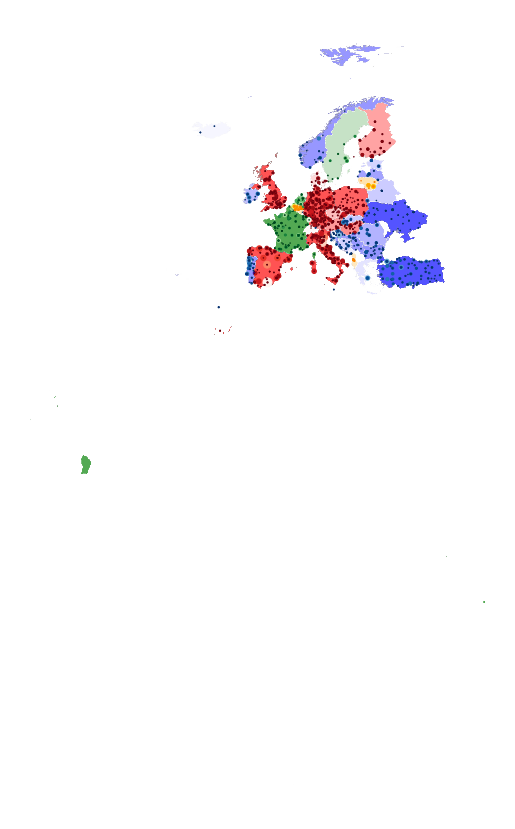

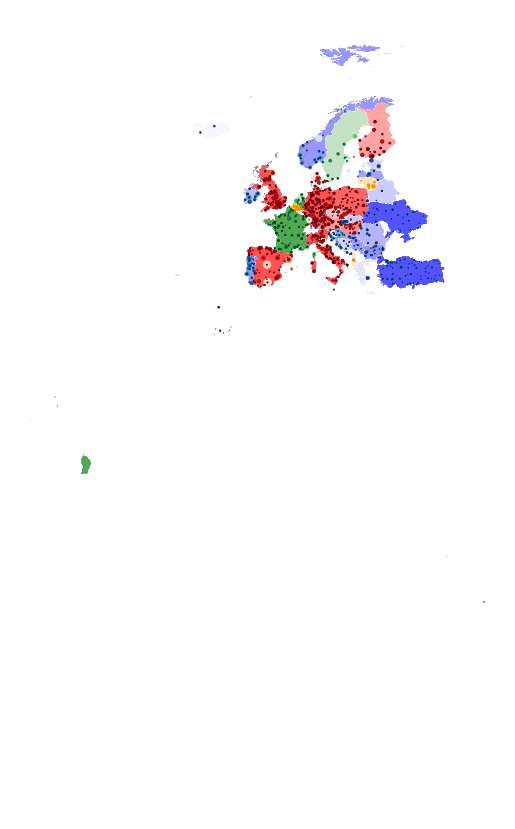

In [28]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'grey']
cmaps = ['Reds_r', 'Blues_r', 'Greens_r', 'Wistia_r', 'Purples_r', 'Greys_r']

fig, ax = plt.subplots(figsize=(20,15))

for c in range(4):
    temp_df = geo_scores[geo_scores['Community'] == c].copy()
    temp_df = gpd.GeoDataFrame(temp_df, geometry = 'geometry')
    temp_df.plot(ax=ax, edgecolor='0.5', linewidth=0.3, color=colors[c], alpha=0.01)
    ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, c=temp_df['PageRank hub'],
                  cmap=cmaps[c])
ax.axis('off')

#plt.savefig('countries_communities & universities_hubs.png')

fig, ax = plt.subplots(figsize=(20,15))

for c in range(4):
    temp_df = geo_scores[geo_scores['Community'] == c].copy()
    temp_df = gpd.GeoDataFrame(temp_df, geometry = 'geometry')
    temp_df.plot(ax=ax, edgecolor='0.5', linewidth=0.3, color=colors[c], alpha=0.01)
    ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank autority']*10**4, c=temp_df['PageRank autority'],
                  cmap=cmaps[c])
ax.axis('off')

#plt.savefig('countries_communities & universities_authorities.png')

### Universities communities geographic plot

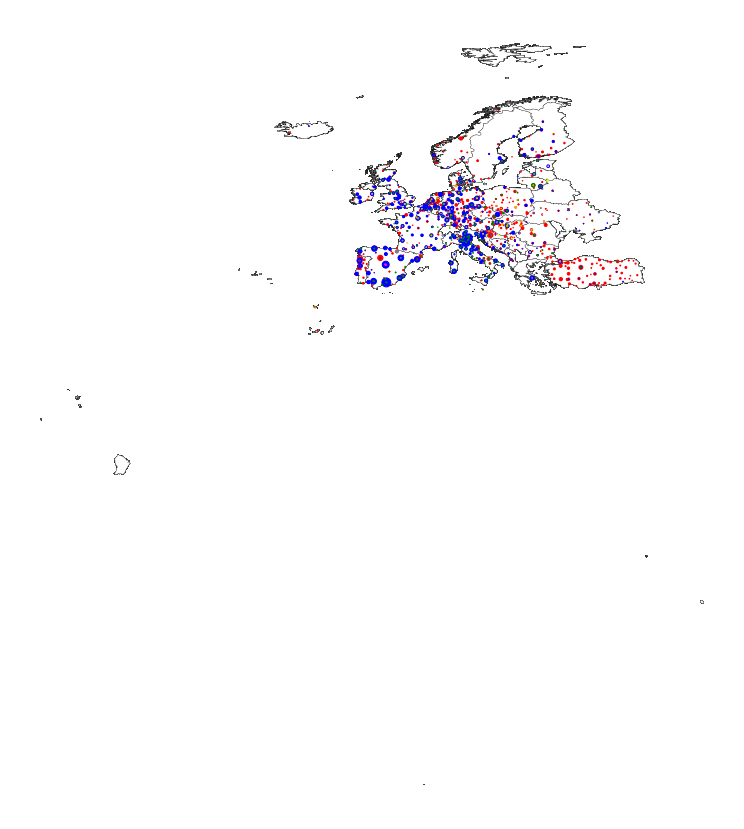

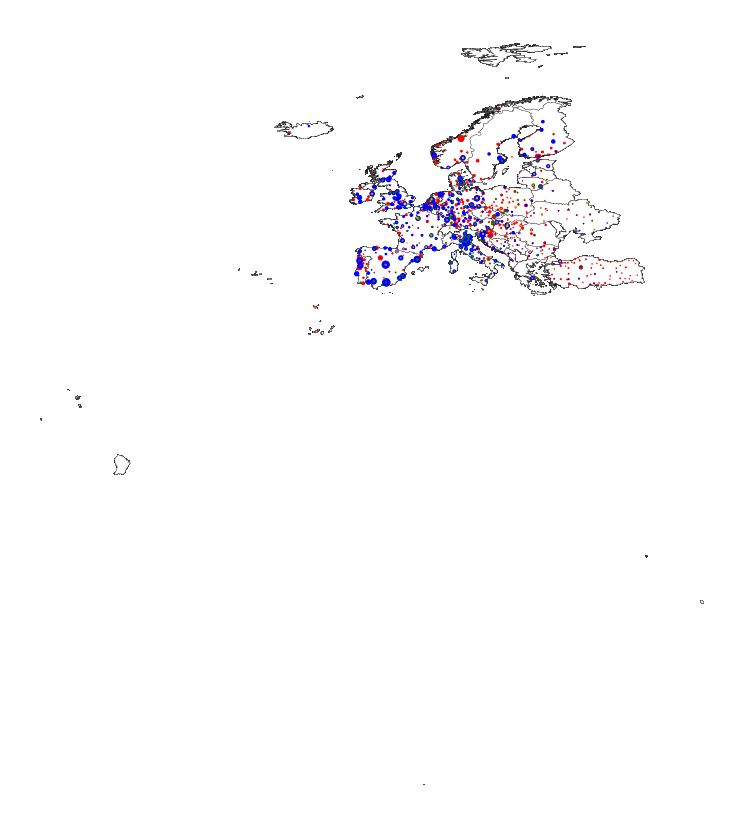

In [41]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'grey', 'gold', 'aqua', 'fuchsia', 'pink', 'yellow', 'salmon', 
          'khaki', 'brown', 'lime', 'skyblue', 'peachpuff', 'ivory', 'powderblue', 'rosybrown', 'royalblue', 
          'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue',
          'slategray', 'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet',
          'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen', 'lightgreen', 'lightgray', 'lightpink', 'lightsalmon', 
          'lightseagreen', 'lightskyblue', 'lightslategray']

geo_plt = geo_scores.copy()
# dropping all communities containing number of universities lower or equal than 2
for c in range(max(geo_plt['uni_Community'])):
    if geo_plt[geo_plt['uni_Community'] == c].shape[0] <= 2:
        geo_plt = geo_plt[geo_plt['uni_Community'] != c]
geo_plt = gpd.GeoDataFrame(geo_plt, geometry='geometry')

# universities sized on PageRank hub score
fig, ax = plt.subplots(figsize=(20,15))

geo_plt.plot(ax=ax, edgecolor='0.1', linewidth=0.3, color='1')

# sns.scatterplot(x='lng', y='lat', data=geo_plt, hue='uni_Community', legend=False, ax=ax, size=geo_plt['PageRank hub']*10**4)
# ax.scatter(x=geo_plt['lng'], y=geo_plt['lat'], s=geo_plt['PageRank hub']*10**4, c=geo_plt['uni_Community'], cmap='jet')

for c in list(geo_plt['uni_Community'].unique()):
    temp_df = geo_plt[geo_plt['uni_Community'] == c].copy()
    temp_df = gpd.GeoDataFrame(temp_df, geometry = 'geometry')
    # ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, c=temp_df['uni_Community'], cmap='Pastel1')
    # ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, cmap='Pastel1')
    # ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, c=temp_df['uni_Community'])
    ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, color=colors[c])
ax.axis('off')

plt.savefig('universities_communities_hubs.png')

# universities sized on PageRank authority score
fig, ax = plt.subplots(figsize=(20,15))

geo_plt.plot(ax=ax, edgecolor='0.1', linewidth=0.3, color='1')

for c in list(geo_plt['uni_Community'].unique()):
    temp_df = geo_plt[geo_plt['uni_Community'] == c].copy()
    temp_df = gpd.GeoDataFrame(temp_df, geometry = 'geometry')
    ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank autority']*10**4, color=colors[c])
ax.axis('off')

plt.savefig('universities_communities_authorities.png')

(-74.63098303979987, 62.068097363800064, -61.22412688574994, 87.53171621275013)

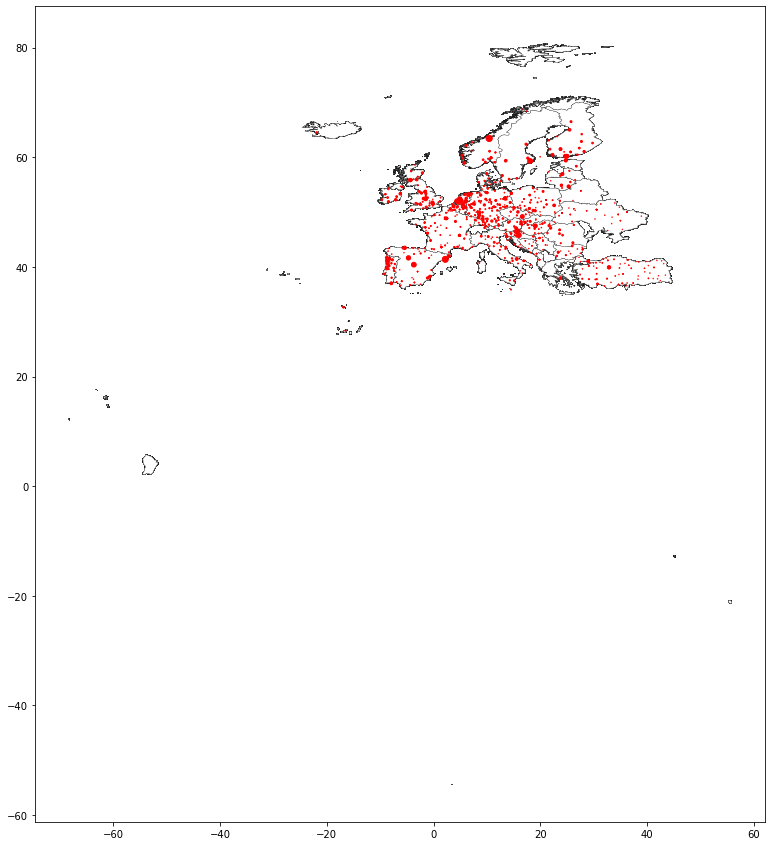

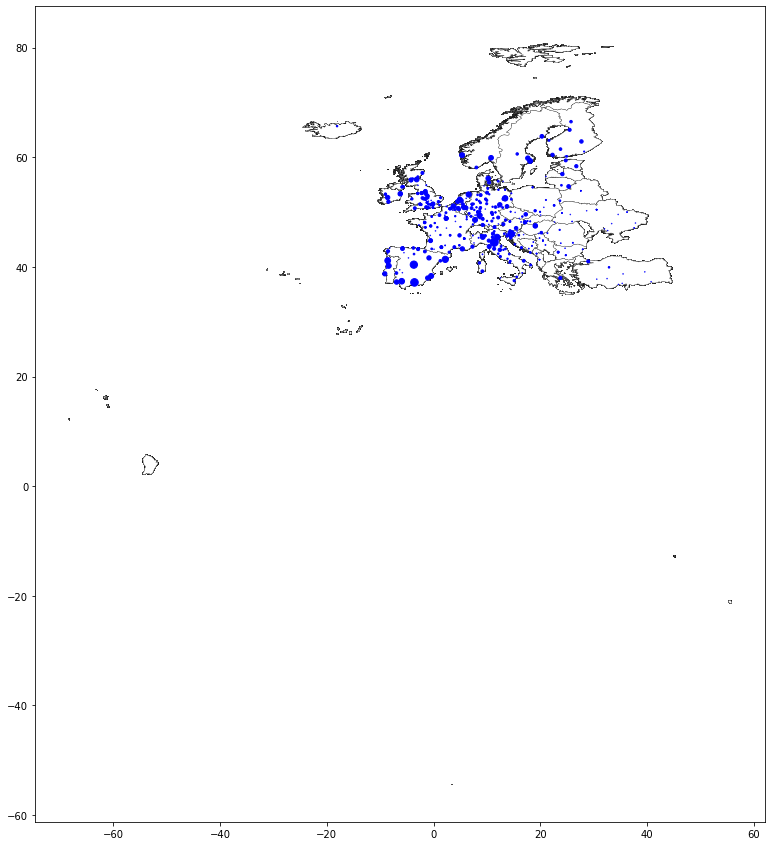

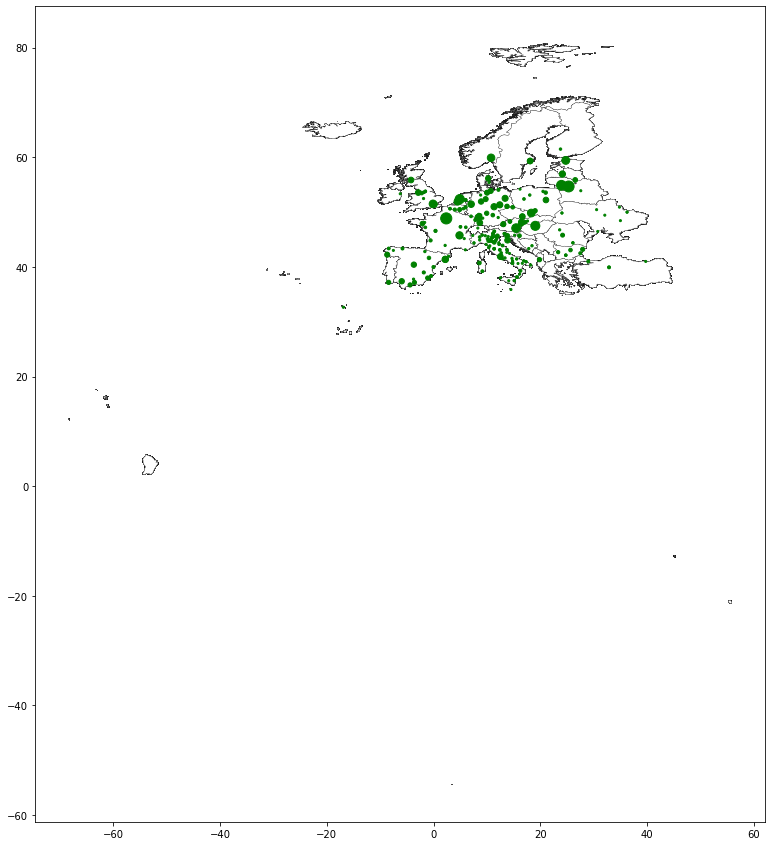

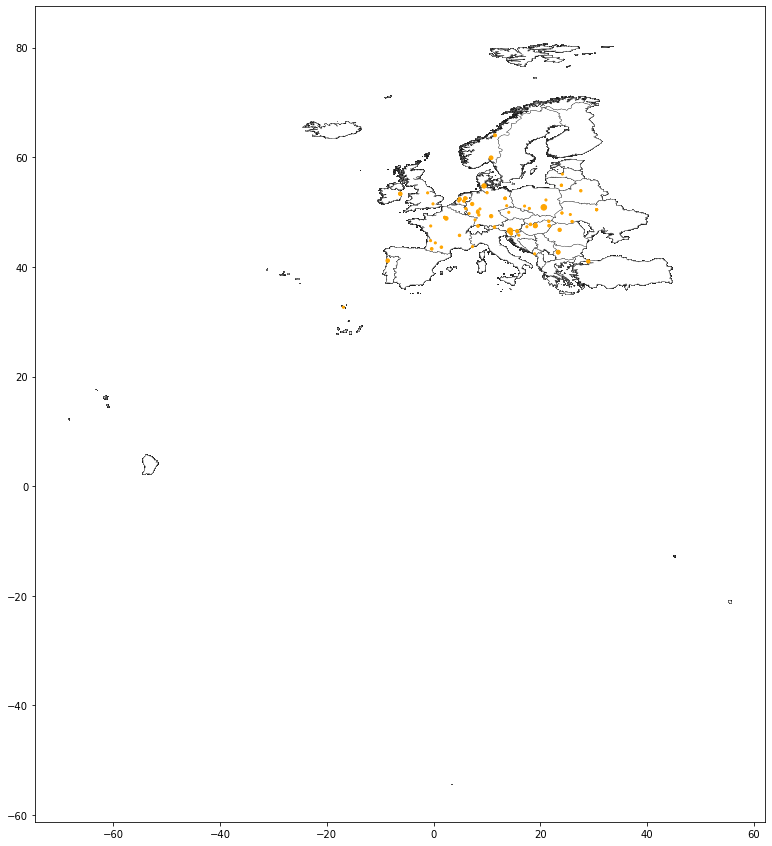

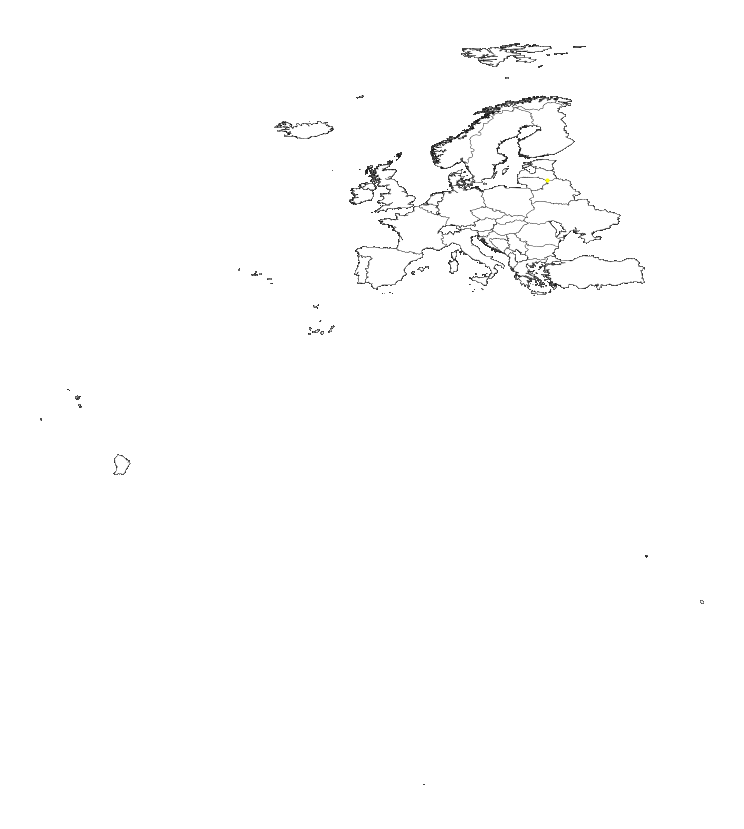

In [42]:
# dropping all communities containing number of universities lower or equal than 50
for c in range(max(geo_plt['uni_Community'])):
    if geo_plt[geo_plt['uni_Community'] == c].shape[0] <= 50:
         geo_plt = geo_plt[geo_plt['uni_Community'] != c]
i=10
for c in list(geo_plt['uni_Community'].unique()):
    fig, ax = plt.subplots(figsize=(20,15))
    geo_plt.plot(ax=ax, edgecolor='0.1', linewidth=0.3, color='1')
    temp_df = geo_plt[geo_plt['uni_Community'] == c]
    temp_df = gpd.GeoDataFrame(temp_df, geometry = 'geometry')
    if(c>1):
        i=20
    ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank autority']*i**4, color=colors[c])
ax.axis('off')

### Robustness

In [30]:
#attack: removing hubs first
nodes_byhub = scores.sort_values('PageRank hub', ascending=False)['NodeID']
indices = list(nodes_byhub)
uni_df = mobility_df.copy()
GC_frac_a = [1]
for node in indices:
    uni_df = uni_df.loc[(uni_df['sourceID'] != node) & (uni_df['targetID'] != node)]
    temp_serie = uni_df.groupby(['sourceID', 'targetID']).sum()
    row = np.array(temp_serie.index.get_level_values(1).tolist())
    col = np.array(temp_serie.index.get_level_values(0).tolist())
    val = temp_serie.values
    temp_adj = sparse.csr_matrix((val.flatten(), (row, col)), shape=(nodes.size, nodes.size))
    GC_frac_a.append(ns.fraction_in_giant(temp_adj))


KeyboardInterrupt: 

In [ ]:
#random node removal
import random
#10 by 10, with average over 10 trials each time
intervals = list(range(10, len(nodes_byhub+1), 10))
uni_df = mobility_df.copy()
GC_frac_r = [1]
for i in intervals:
    i_GC_frac = []
    for j in range(10):
        removed = random.sample(indices, i)
        temp_df = uni_df.loc[~(uni_df['sourceID'].isin(removed) | (uni_df['targetID'].isin(removed)))]
        temp_serie = temp_df.groupby(['sourceID', 'targetID']).sum()
        row = np.array(temp_serie.index.get_level_values(1).tolist())
        col = np.array(temp_serie.index.get_level_values(0).tolist())
        val = temp_serie.values
        temp_adj = sparse.csr_matrix((val.flatten(), (row, col)), shape=(nodes.size, nodes.size))
        i_GC_frac.append(ns.fraction_in_giant(temp_adj))
    GC_frac_r.append(sum(i_GC_frac)/10)

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.plot([i/len(nodes_byhub) for i in range(len(nodes_byhub)+1)], GC_frac_a, label='Targeted attack')
plt.plot([0]+[i/(len(intervals)*10) for i in intervals], GC_frac_r, 'r', label='Random node removal')
plt.plot([0,1], [1,0], 'g', label='linear reference')
plt.xlabel('Fraction of nodes in the giant component', size=14)
plt.ylabel('Fraction of removed nodes', size=14)
plt.title('Robustness', size=20)
plt.legend(fontsize=16)
plt.show()